In [13]:
import os
import sys
import json

# Get the absolute path to the parent directory of 'project_root'
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from project_root.backend.src.MatchTimelineDto_class import create_MatchTimelineDto_instance

file_path = '../project_root/tests/files/NA1_4729149632_match_timeline.json'
with open(file_path, 'r') as file:
    timeline_data = json.load(file)

timeline_instance = create_MatchTimelineDto_instance(timeline_data)

gold_df = timeline_instance.get_gold_by_participant()

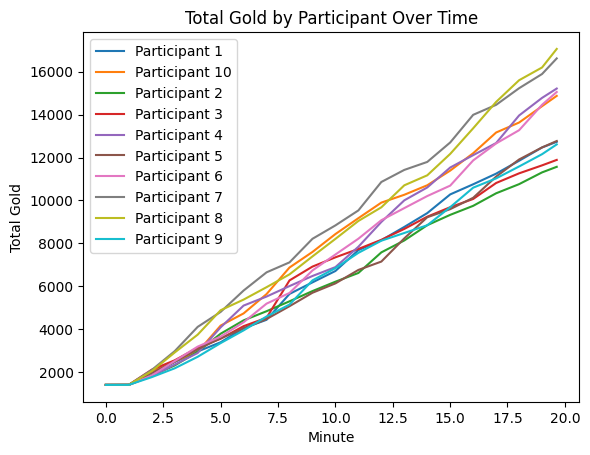

In [16]:
import matplotlib.pyplot as plt

# Group by participant_id and plot each group
for participant_id, group in gold_df.groupby('participant_id'):
    minute = (group['frame']/1000)/60
    plt.plot(minute, group['totalGold'], label=f'Participant {participant_id}')

plt.xlabel('Minute')
plt.ylabel('Total Gold')
plt.title('Total Gold by Participant Over Time')
plt.legend()
plt.show()


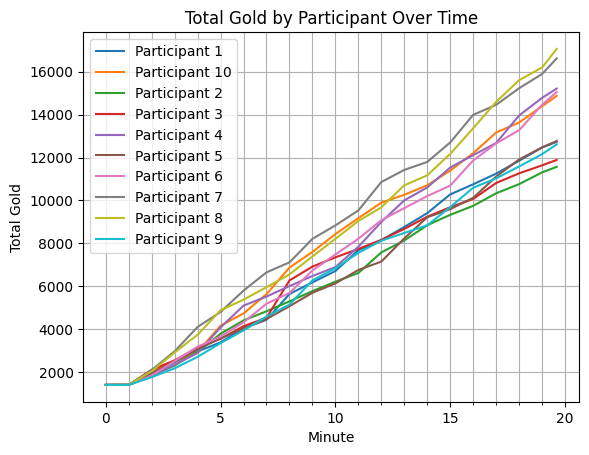

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Group by participant_id and plot each group
for participant_id, group in gold_df.groupby('participant_id'):
    minute = (group['frame']/1000)/60
    plt.plot(minute, group['totalGold'], label=f'Participant {participant_id}')

plt.xlabel('Minute')
plt.ylabel('Total Gold')
plt.title('Total Gold by Participant Over Time')

# Setting major ticks at every 5 minutes and minor ticks at 1-minute intervals
ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))  # Major ticks at every 5 minutes
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))  # Minor ticks at every 1 minute

plt.legend()
plt.grid(which='both')  # Enable grid for both major and minor ticks
plt.show()
